In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.shape

(768, 9)

In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
corr = df.corr()
corr


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
corr['Outcome'][:-1].sort_values(ascending=True)

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Name: Outcome, dtype: float64

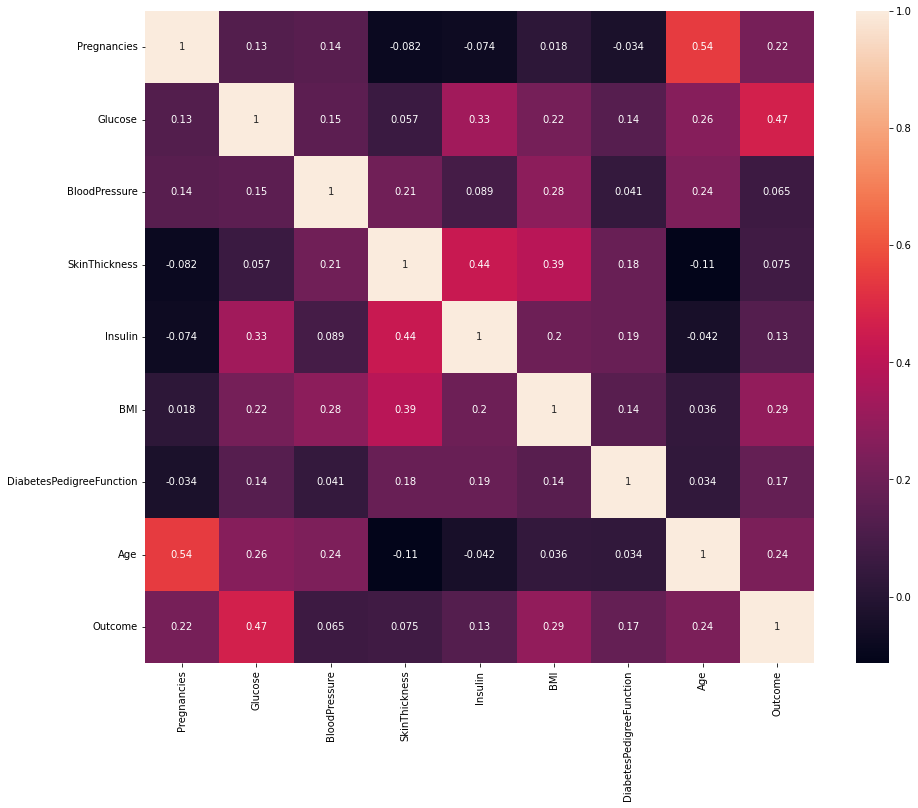

In [10]:
fig = plt.figure(figsize =(15, 12))
sns.heatmap(corr, annot=True)
plt.show()

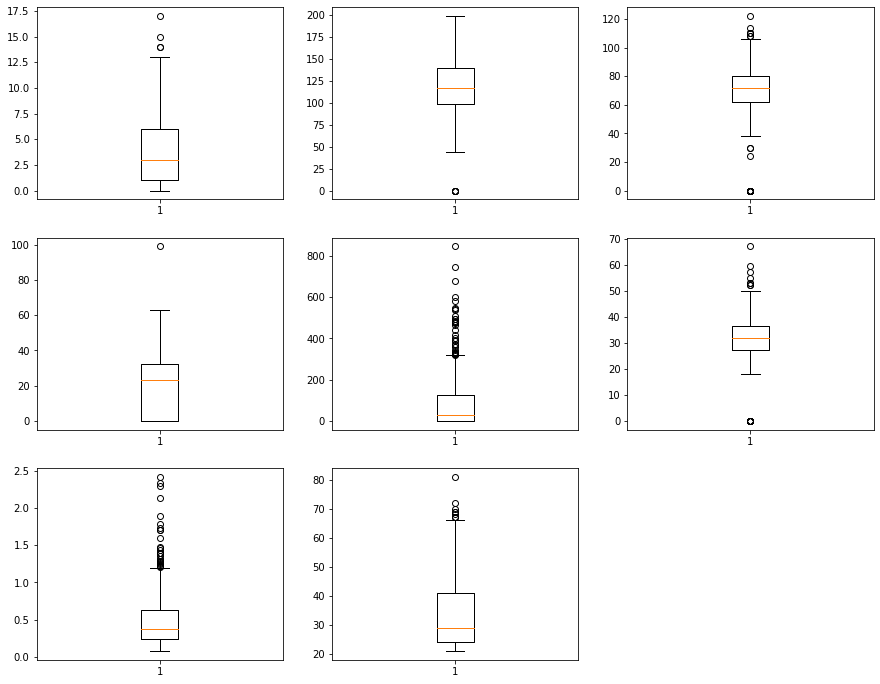

In [11]:
fig = plt.figure(figsize =(15, 12))
plt.subplot(3,3,1)
plt.boxplot(df['Pregnancies'])
plt.subplot(3,3,2)
plt.boxplot(df['Glucose'])
plt.subplot(3,3,3)
plt.boxplot(df['BloodPressure'])
plt.subplot(3,3,4)
plt.boxplot(df['SkinThickness'])
plt.subplot(3,3,5)
plt.boxplot(df['Insulin'])
plt.subplot(3,3,6)
plt.boxplot(df['BMI'])
plt.subplot(3,3,7)
plt.boxplot(df['DiabetesPedigreeFunction'])
plt.subplot(3,3,8)
plt.boxplot(df['Age'])


plt.show()

In [12]:
from numpy import percentile
# calculate interquartile range
q25, q75 = percentile(df, 25), percentile(df, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
df = df[~((df < (q25 - 1.5 * iqr)) |(df > (q75 + 1.5 * iqr))).any(axis=1)]
df

Percentiles: 25th=0.462, 75th=61.000, IQR=60.538


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


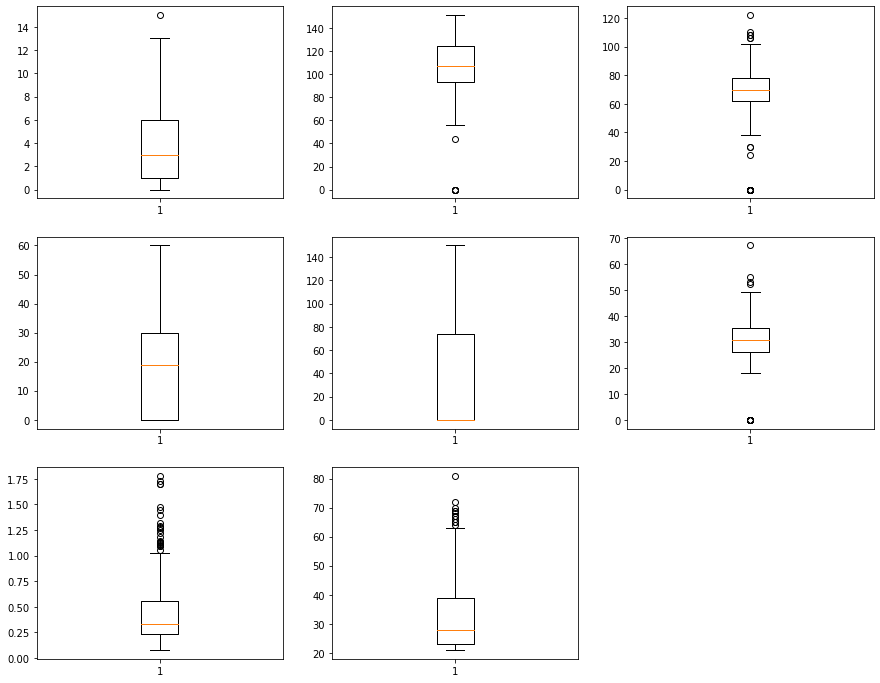

In [13]:
fig = plt.figure(figsize =(15, 12))
plt.subplot(3,3,1)
plt.boxplot(df['Pregnancies'])
plt.subplot(3,3,2)
plt.boxplot(df['Glucose'])
plt.subplot(3,3,3)
plt.boxplot(df['BloodPressure'])
plt.subplot(3,3,4)
plt.boxplot(df['SkinThickness'])
plt.subplot(3,3,5)
plt.boxplot(df['Insulin'])
plt.subplot(3,3,6)
plt.boxplot(df['BMI'])
plt.subplot(3,3,7)
plt.boxplot(df['DiabetesPedigreeFunction'])
plt.subplot(3,3,8)
plt.boxplot(df['Age'])


plt.show()

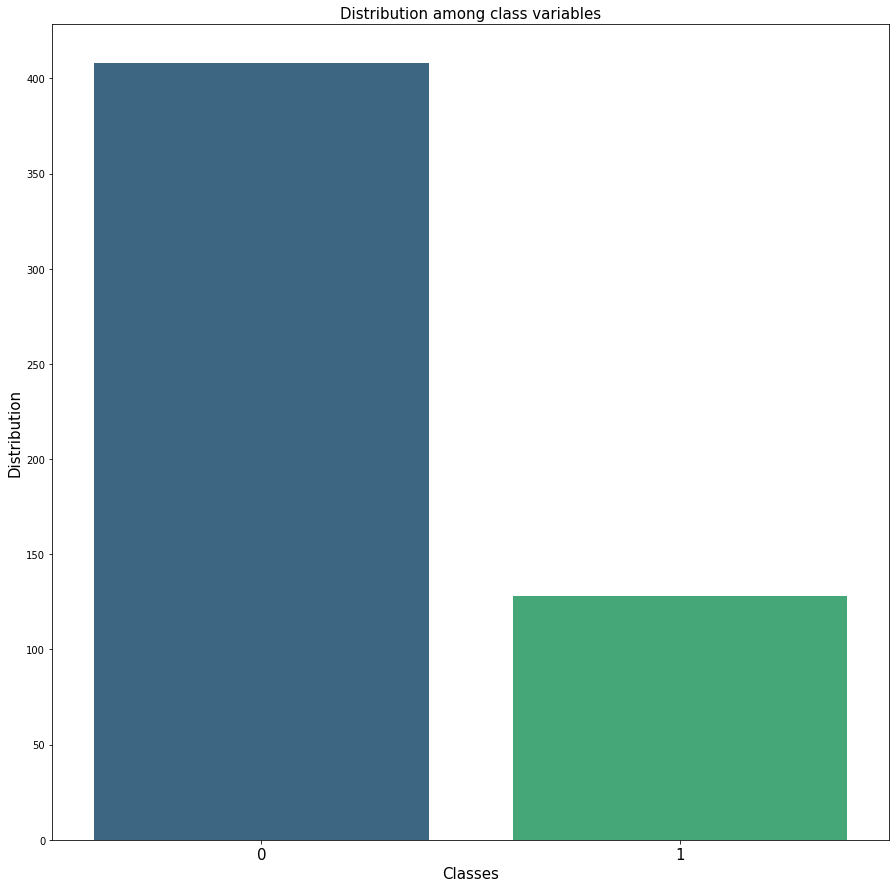

In [14]:
plt.figure(figsize=(15,15))

sns.countplot(x ='Outcome', data = df, palette = 'viridis')

plt.title('Distribution among class variables', fontsize = 15)
plt.xlabel('Classes', fontsize = 15)
plt.ylabel('Distribution', fontsize = 15)
plt.xticks(fontsize = 15)

# Show the plot
plt.show()

In [27]:
y.value_counts(normalize = True) # imbalanced classes


0    0.761194
1    0.238806
Name: Outcome, dtype: float64

In [29]:
#X = df2.loc[:, df2.columns != 'y']
#y = df2.loc[:, df2.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  562
Number of no subscription in oversampled data 0
Number of subscription 0
Proportion of no subscription data in oversampled data is  0.0
Proportion of subscription data in oversampled data is  0.0


In [42]:
pd.concat([os_data_X,os_data_y],axis=1).shape
# print(df1.head())

(562, 9)

In [35]:
plt.figure(figsize=(15,15))

sns.countplot(x ='Outcome', data = df1, palette = 'viridis')

plt.title('Distribution among class variables', fontsize = 15)
plt.xlabel('Classes', fontsize = 15)
plt.ylabel('Distribution', fontsize = 15)
plt.xticks(fontsize = 15)

# Show the plot
plt.show()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0     90.0           62.0           12.0     43.0  27.2   
1          0.0    131.0           88.0            0.0      0.0  31.6   
2          0.0    108.0           68.0           20.0      0.0  27.3   
3          1.0     88.0           78.0           29.0     76.0  32.0   
4          2.0    112.0           66.0           22.0      0.0  25.0   

   DiabetesPedigreeFunction   Age    y  
0                     0.580  24.0  NaN  
1                     0.743  32.0  NaN  
2                     0.787  32.0  NaN  
3                     0.365  29.0  NaN  
4                     0.307  24.0  NaN  


ValueError: Could not interpret input 'Outcome'

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

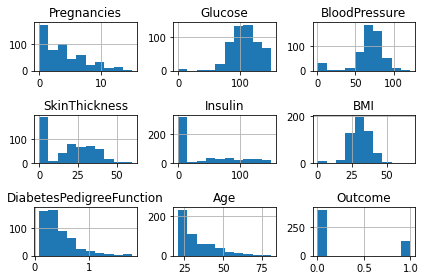

In [17]:
# Histogram shows the distribution of each feature
plt.figure(figsize=(15,15))
df.hist(xrot = 1, )
plt.tight_layout()
plt.show()  

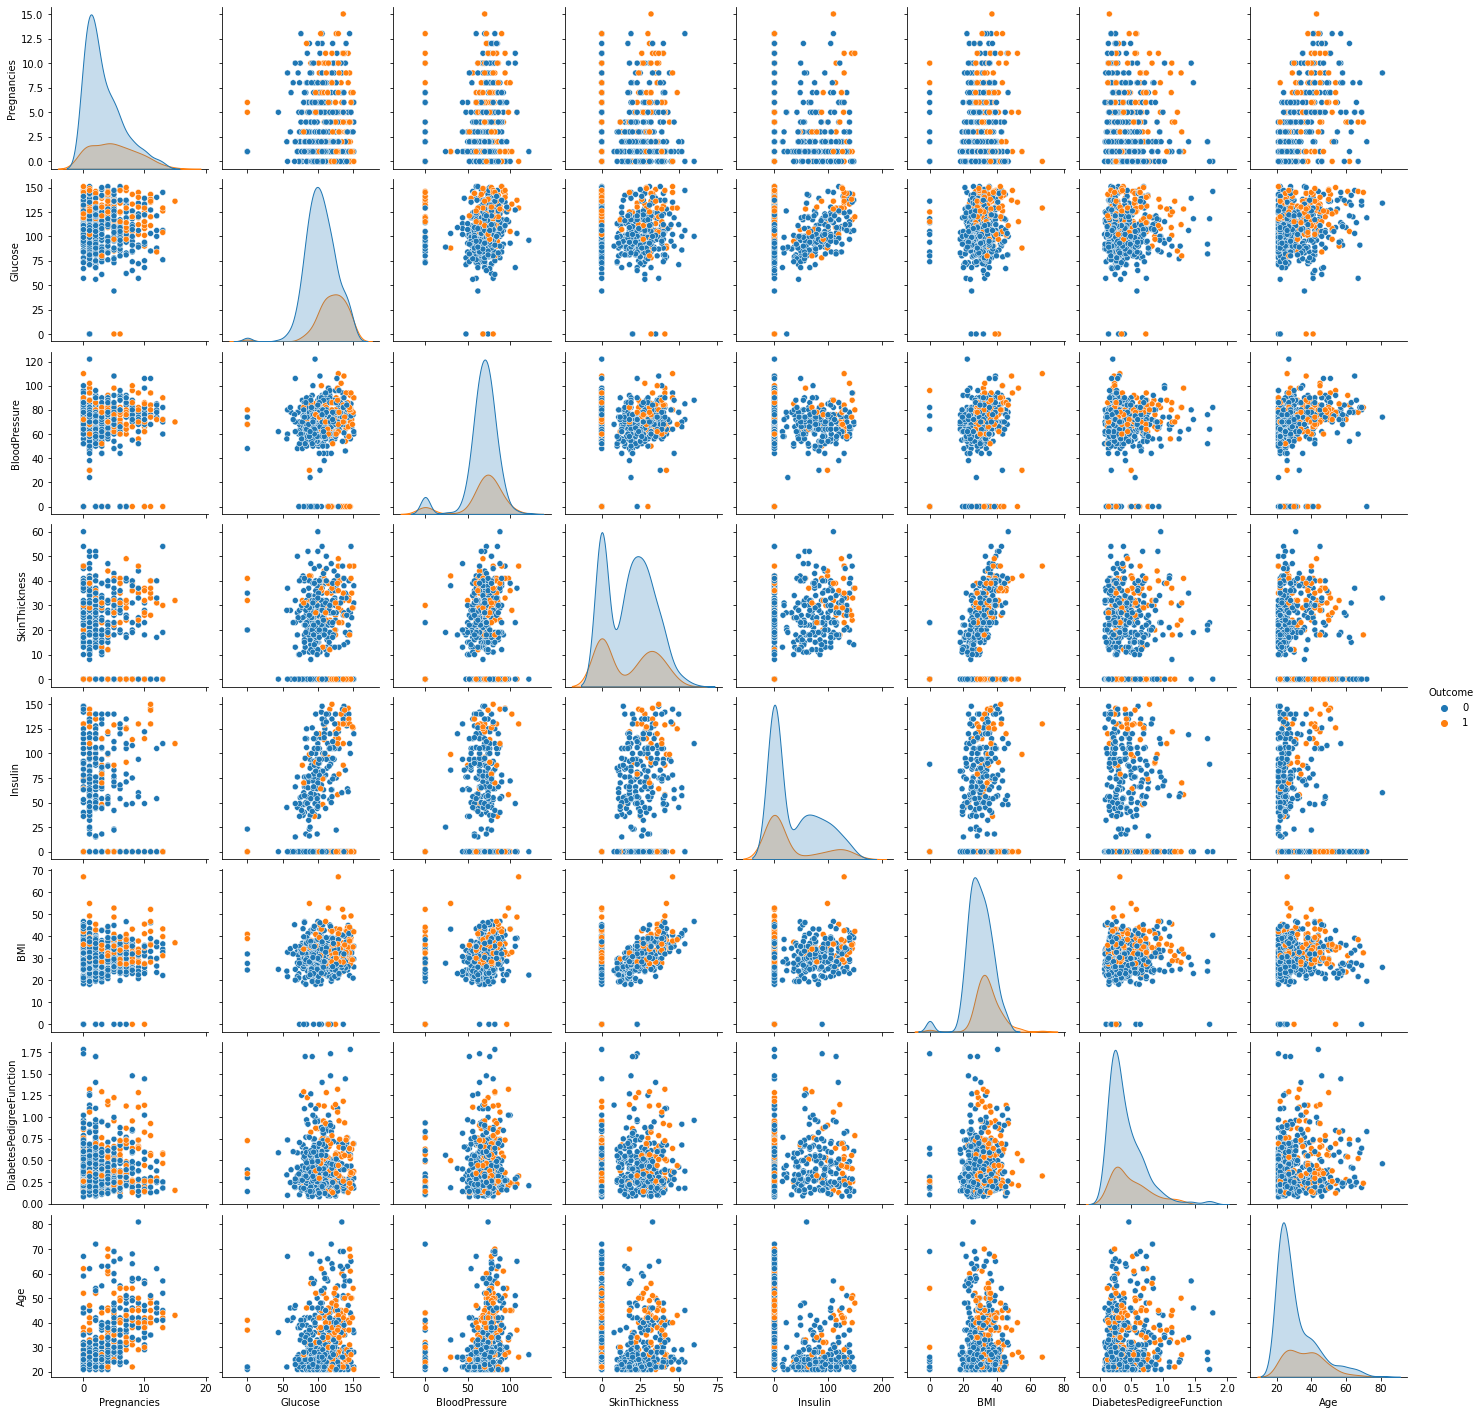

In [19]:
sns.pairplot(data=df, hue="Outcome")
plt.show()


In [22]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=11)


In [44]:

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("test score with naive bayes: ", nb.score(x_test,y_test))
nb_score = nb.score(x_test,y_test)

test score with naive bayes:  0.7592592592592593


In [45]:
y_pred_nb = nb.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_nb)
print("NB result confusion matrix : \n", cm)

NB result confusion matrix : 
 [[71  7]
 [19 11]]


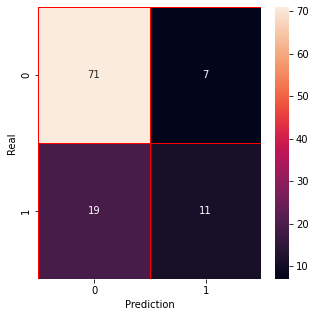

In [46]:
#confusion metrics visualization
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.show()

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        78
           1       0.61      0.37      0.46        30

    accuracy                           0.76       108
   macro avg       0.70      0.64      0.65       108
weighted avg       0.74      0.76      0.74       108

Confusion Matrix : 
 [[71  7]
 [19 11]]


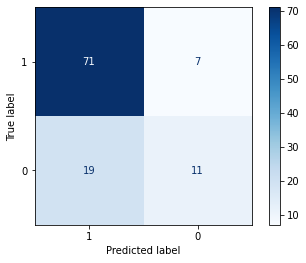

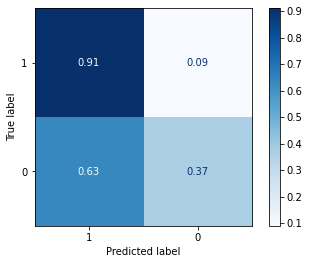

In [49]:
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix

print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred_nb))

class_names = df.Outcome.unique()

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(nb, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
plt.show()

In [50]:
from sklearn.metrics import accuracy_score

nb_acc = accuracy_score(y_test, y_pred_nb)
print("Accuracy of the model : ", nb_acc)

Accuracy of the model :  0.7592592592592593


In [52]:
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(x_train, y_train)
test_pred = rfcl.predict(x_test)
rfcl_score=rfcl.score(x_test , y_test)
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The confusion matrix of Random Forest Model is")
print(metrics.confusion_matrix(y_test,test_pred))


The Random forest model accuracy is 0.7222222222222222
The confusion matrix of Random Forest Model is
[[74  4]
 [26  4]]


In [53]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(x_train, y_train)

test_pred = abcl.predict(x_test)
abcl_score=abcl.score(x_test, y_test)
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The confusion matrix of Adaboost Ensemble model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Adaboost Ensemble model accuracy is 0.7962962962962963
The confusion matrix of Adaboost Ensemble model is
[[71  7]
 [15 15]]


In [54]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(x_train, y_train)
test_pred = bgcl.predict(x_test)
bgcl_score=bgcl.score(x_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Bagging classifier model accuracy is 0.7222222222222222
The confusion matrix of Bagging classifier model is
[[72  6]
 [24  6]]


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(x_train, y_train)
test_pred = gbcl.predict(x_test)
gbcl_score=gbcl.score(x_test , y_test)
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))
print("The confusion matrix of Gradient Boost classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Gradient Boost classifier model accuracy is 0.7222222222222222
The confusion matrix of Gradient Boost classifier model is
[[73  5]
 [25  5]]


In [56]:
print("The Naive Bayes model accuracy is {}".format(nb_score))
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))

The Naive Bayes model accuracy is 0.7592592592592593
The Random forest model accuracy is 0.7222222222222222
The Adaboost Ensemble model accuracy is 0.7962962962962963
The Bagging classifier model accuracy is 0.7222222222222222
The Gradient Boost classifier model accuracy is 0.7222222222222222


### To be improved ....